# Milestone 3
# Analyzing the Demand for Bike Sharing

Bike-sharing systems are a means of renting bicycles where the process of obtaining membership, rental, and bike return is automated via a network of kiosk locations throughout a city. Using these systems, people are able rent a bike from a one location and return it to a different place on an as-needed basis. Currently, there are over 500 bike-sharing programs around the world.


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [12]:
df = pd.read_csv('/Users/mohamedalbasuony/Downloads/bike+sharing+dataset/day.csv')
df['dteday'] = pd.to_datetime(df['dteday'])
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [13]:
#creating dimensions for Modelling
x_data = df.drop(['cnt', 'dteday', 'season'], axis=1)
y_data = df['cnt']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data,test_size=0.2,random_state=1)
lm = LinearRegression() 
lm.fit(x_train,y_train)

LinearRegression()

In [15]:
yhat= lm.predict(x_test)
print("Predicted cnt for test data are:", yhat[0:5].tolist())

Predicted cnt for test data are: [3830.000000000001, 2114.000000000004, 3915.0, 4322.0, 6591.000000000001]


/var/folders/t0/_18sthrn42g1b8nk7jfnmjrh0000gn/T/ipykernel_66152/2628485769.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_data,hist=False,color="green",label="Actual Value")
/var/folders/t0/_18sthrn42g1b8nk7jfnmjrh0000gn/T/ipykernel_66152/2628485769.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed29

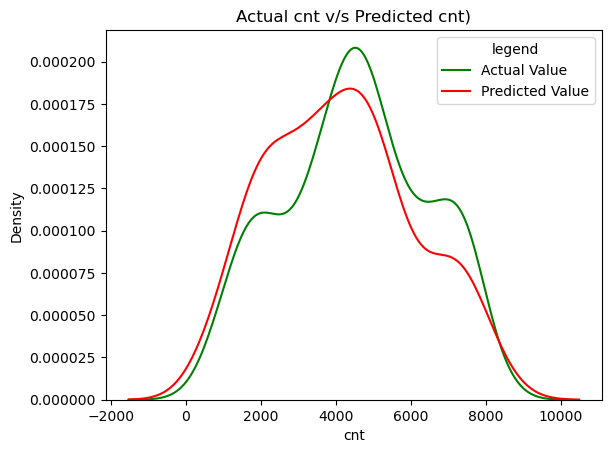

In [16]:
import seaborn as sns
plt.title("Actual cnt v/s Predicted cnt)")
ax1 = sns.distplot(y_data,hist=False,color="green",label="Actual Value")
sns.distplot(yhat,hist=False,color='red',label="Fitted Value",ax = ax1)
plt.legend(title='legend', loc='upper right', labels=['Actual Value', 'Predicted Value'])
plt.show()

In [17]:
#Mean Squared Error(MSE)
mse = mean_squared_error(y_test, yhat)
mse

6.648833450454136e-24

In [18]:
print('the R-Squared value of fitted model is:',lm.score(x_train,y_train))


the R-Squared value of fitted model is: 1.0


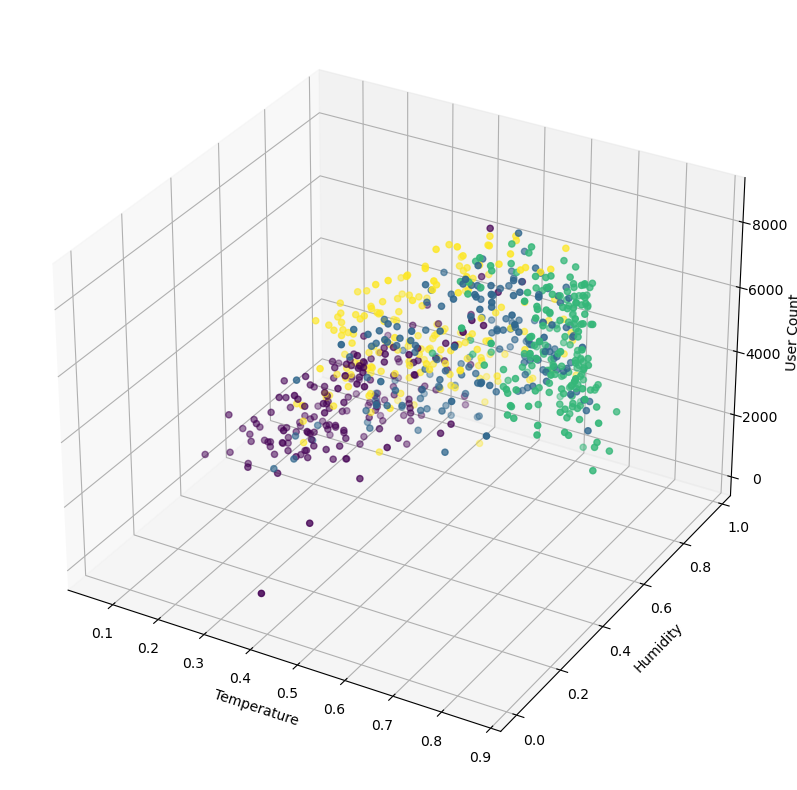

In [3]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df["temp"], df["hum"], df["cnt"], c=df["season"], cmap="viridis")

ax.set_xlabel("Temperature")
ax.set_ylabel("Humidity")
ax.set_zlabel("User Count")

plt.show()

**This 3D scatter plot allows us to visualize the complex interplay between temperature, humidity, and user count. We can observe distinct clusters of user count based on temperature and humidity combinations. Additionally, the color-coding by season reveals seasonal variations in these relationships.**

/Users/mohamedalbasuony/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


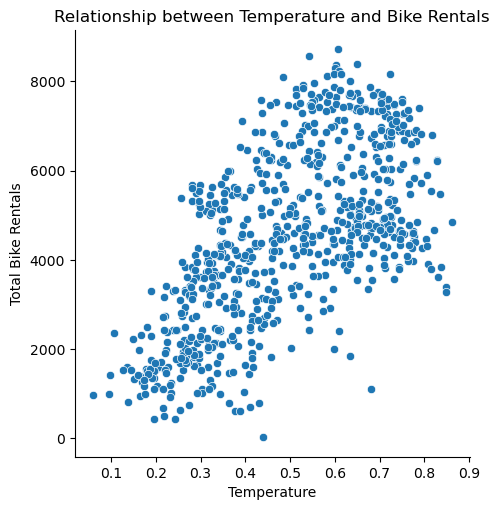

In [4]:
# Bivariate Analysis using Seaborn's relplot:

import seaborn as sns

# Create a relplot to visualize the relationship between 'temp' and 'cnt'
sns.relplot(x="temp", y="cnt", data=df)
plt.title("Relationship between Temperature and Bike Rentals")
plt.xlabel("Temperature")
plt.ylabel("Total Bike Rentals")
plt.show()

**This relplot helps us understand the relationship between temperature and the total number of bike rentals. We can see a positive correlation, indicating that as the temperature increases, the number of bike rentals also tends to increase.**


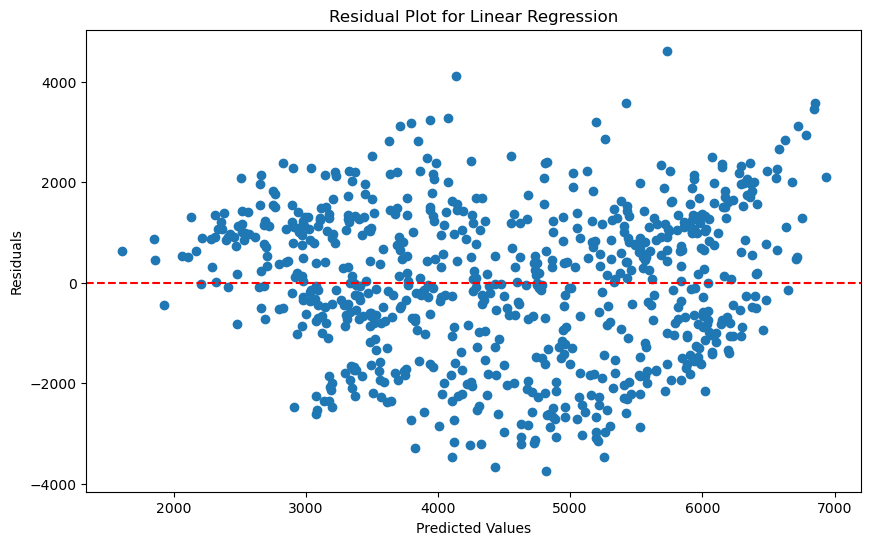

In [5]:
#Residual Plot for Linear Regression:
from sklearn.linear_model import LinearRegression

# Fit a linear regression model
X = df[['temp']]
y = df['cnt']
model = LinearRegression()
model.fit(X, y)

# Create a residual plot
plt.figure(figsize=(10, 6))
plt.scatter(model.predict(X), model.predict(X) - y)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residual Plot for Linear Regression")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

**The residual plot helps us assess the validity of the linear regression model. The random scatter of the residuals around the horizontal line at 0 suggests that the model is a good fit for the data.**


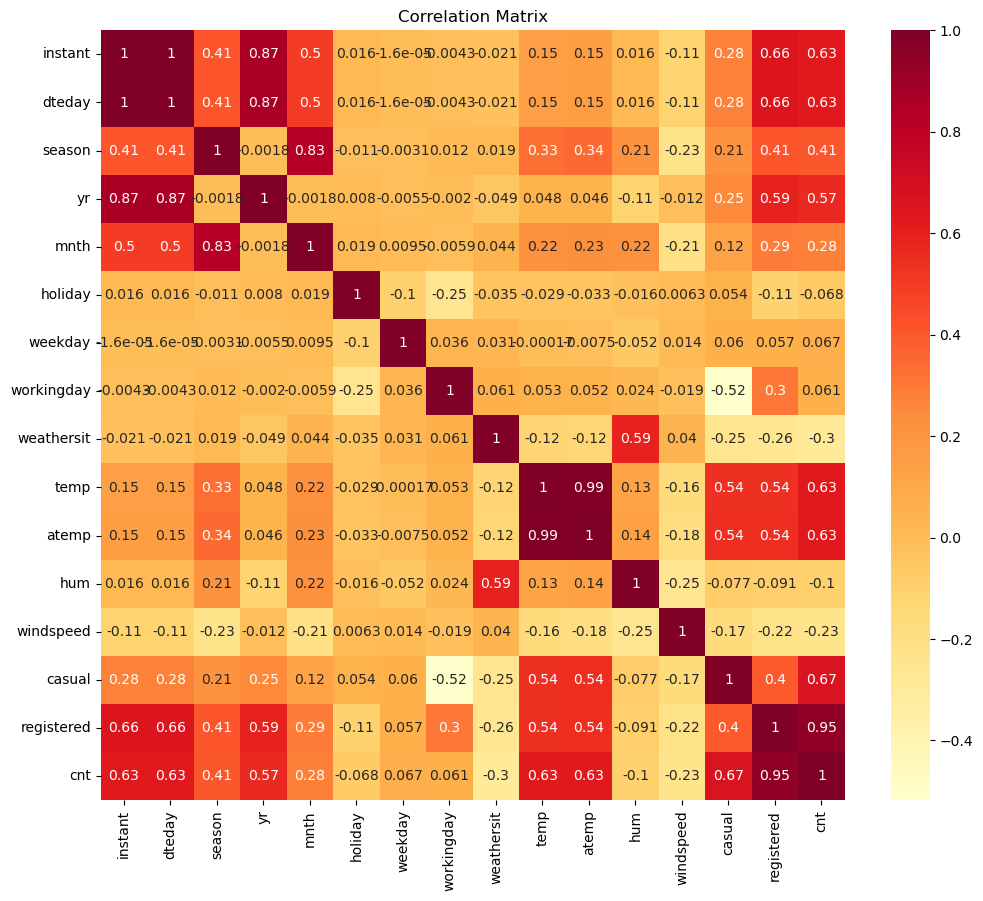

In [6]:
# Create a correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix using Seaborn's heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd')
plt.title("Correlation Matrix")
plt.show()

**This correlation matrix provides insights into the relationships between different variables in the dataset. It helps us identify which variables are strongly correlated with the target variable 'cnt'.**


/Users/mohamedalbasuony/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


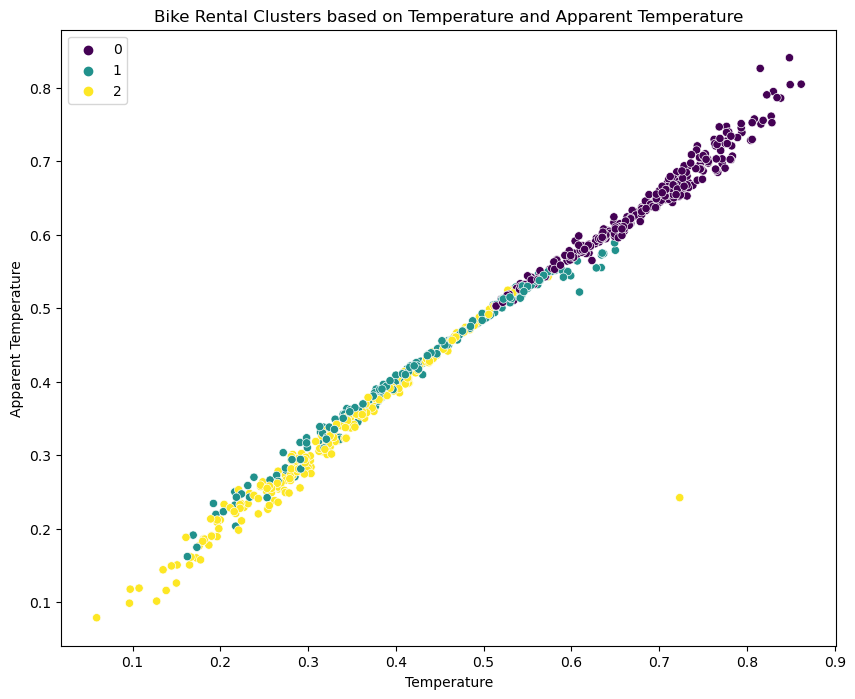

In [7]:
#Clustering Analysis using K-Means:

from sklearn.cluster import KMeans

# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['temp', 'atemp', 'hum', 'windspeed']])

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Visualize the clusters using Seaborn's scatterplot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='temp', y='atemp', data=df, hue=labels, palette='viridis')
plt.title("Bike Rental Clusters based on Temperature and Apparent Temperature")
plt.xlabel("Temperature")
plt.ylabel("Apparent Temperature")
plt.show()

**This clustering analysis groups the bike rental data based on the temperature, apparent temperature, humidity, and windspeed. The resulting clusters can be used to better understand the patterns in bike rental demand under different environmental conditions.**